In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [4]:
# Load the data
data = pd.read_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/env_data_redo.csv')

# Display the first few rows of the data
data.head()

GrndTruth    bd_0_5   bd_5_15  bd_15_30  bd_30_60  bd_60_100  bd_100_200  \
0          0  1.501241  1.505308  1.516810  1.526426   1.500391    1.409395   
1          0  1.472266  1.465323  1.449219  1.404249   1.380312    1.380820   
2          0  1.501241  1.505308  1.516810  1.526426   1.500391    1.409395   
3          0  1.501241  1.505308  1.516810  1.526426   1.500391    1.409395   
4          0  1.501241  1.505308  1.516810  1.526426   1.500391    1.409395   

   clay_0_5  clay_5_15  clay_15_30  ...    kw_025  resdept  soil_depth  \
0  2.519531   2.206055    1.445366  ...  0.161334      NaN  199.443390   
1  6.673998   7.309153   10.327317  ...  0.261087    152.0  182.866058   
2  2.519531   2.206055    1.445366  ...  0.161829      NaN  197.027023   
3  2.519531   2.206055    1.445366  ...  0.161645      NaN  197.926926   
4  2.519531   2.206055    1.445366  ...  0.198447    152.0  189.247620   

   wind_erodibility_index    rf_025  water_storage       bio12       bio07  \
0              235.789368  0.014965      17.290722  371.529938  391.535461   
1              145.648697  0.008968      22.138235  373.559875  391.007751   
2              230.628860  0.014213      17.379517  369.475800  392.318695   
3              232.550720  0.014493      17.346449  371.996948  391.005219   
4              182.433578  0.011540      18.619032  373.123810  391.010101   

    dist_drain   dist_road  
0   350.048144  182.553664  
1   551.249463  322.862755  
2  1649.853715  755.116202  
3   674.686663  371.043838  
4   704.734825  371.034541  

[5 rows x 69 columns]

In [67]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('GrndTruth', axis=1)
y = data['GrndTruth']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42) #test size orginally 0.3

https://www.youtube.com/watch?v=GrJP9FLV3FE

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27 \
https://notebook.community/slundberg/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost

In [69]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42)
stq_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.48023
[1]	validation_0-logloss:0.43557
[2]	validation_0-logloss:0.41903
[3]	validation_0-logloss:0.39706
[4]	validation_0-logloss:0.38232
[5]	validation_0-logloss:0.37854
[6]	validation_0-logloss:0.37637
[7]	validation_0-logloss:0.38052
[8]	validation_0-logloss:0.37984
[9]	validation_0-logloss:0.38159
[10]	validation_0-logloss:0.38702
[11]	validation_0-logloss:0.39155
[12]	validation_0-logloss:0.39154
[13]	validation_0-logloss:0.40033
[14]	validation_0-logloss:0.39504
[15]	validation_0-logloss:0.40330


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

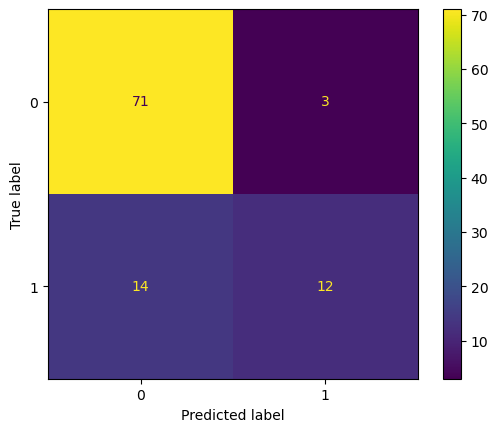

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}

param_grid_2 = {
    "max_depth" : [5, 6, 7],
    "learning_rate" : [0.1, 0.5, 1],
    "gamma" : [1, 5, 10],
    "reg_lambda" : [10, 20, 50],
    "scale_pos_weight" : [3],
    "eta" : [0.01, 0.005, 0.001],
    #"objective": "binary:logistic",
    #"subsample": 0.5,
    #"base_score": np.mean(y_train),
    #"eval_metric": "logloss"
}

optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                             seed = 42,
                             subsample = 0.9,
                             colsample_bytree = 0.5),
    param_grid = param_grid_2,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

{'eta': 0.01, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10, 'scale_pos_weight': 3}


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


In [71]:
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            seed = 42, 
                            max_depth = 4, # how deep the tree will go -- originally 4
                            learning_rate = 0.05, # also known as eta
                            gamma = 0.25, # originally 0.25
                            reg_lambda = 5, # was set to 1
                            scale_pos_weight = 2.8, #sum(negative instances) / sum(positive instances) - was set to 5 originally
                            subsample = 0.7,) # was set to .5 initially. Should be 0.5 or greater
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.67014
[1]	validation_0-logloss:0.64845
[2]	validation_0-logloss:0.62952
[3]	validation_0-logloss:0.61393
[4]	validation_0-logloss:0.59829
[5]	validation_0-logloss:0.58238
[6]	validation_0-logloss:0.57361
[7]	validation_0-logloss:0.55918
[8]	validation_0-logloss:0.54701
[9]	validation_0-logloss:0.53682
[10]	validation_0-logloss:0.52642
[11]	validation_0-logloss:0.51768
[12]	validation_0-logloss:0.51001
[13]	validation_0-logloss:0.50097
[14]	validation_0-logloss:0.49364
[15]	validation_0-logloss:0.48695
[16]	validation_0-logloss:0.48048
[17]	validation_0-logloss:0.47375
[18]	validation_0-logloss:0.47032
[19]	validation_0-logloss:0.46380
[20]	validation_0-logloss:0.45771
[21]	validation_0-logloss:0.45119
[22]	validation_0-logloss:0.44605
[23]	validation_0-logloss:0.44217
[24]	validation_0-logloss:0.43801
[25]	validation_0-logloss:0.43208
[26]	validation_0-logloss:0.42870
[27]	validation_0-logloss:0.42423
[28]	validation_0-logloss:0.42167
[29]	validation_0-loglos

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

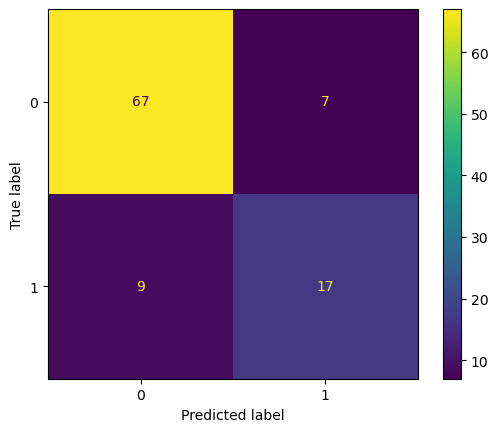

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [118]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.00%


In [74]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

In [75]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.362618592611391

In [76]:
from sklearn.metrics import classification_report
import shap
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        74
           1       0.71      0.65      0.68        26

    accuracy                           0.84       100
   macro avg       0.79      0.78      0.79       100
weighted avg       0.84      0.84      0.84       100



https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 \
https://christophm.github.io/interpretable-ml-book/shap.html
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

[23:51:46] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[23:51:46] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


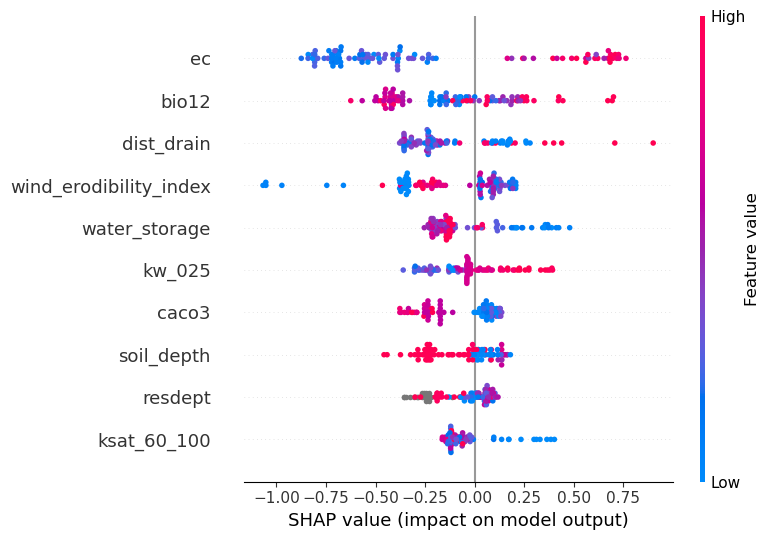

In [116]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display = 10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


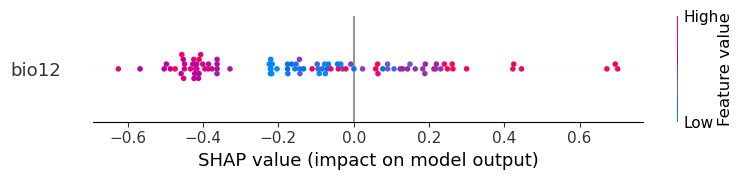

In [91]:
shap.summary_plot(shap_values[:,64:65], X_test.iloc[:, 64:65])

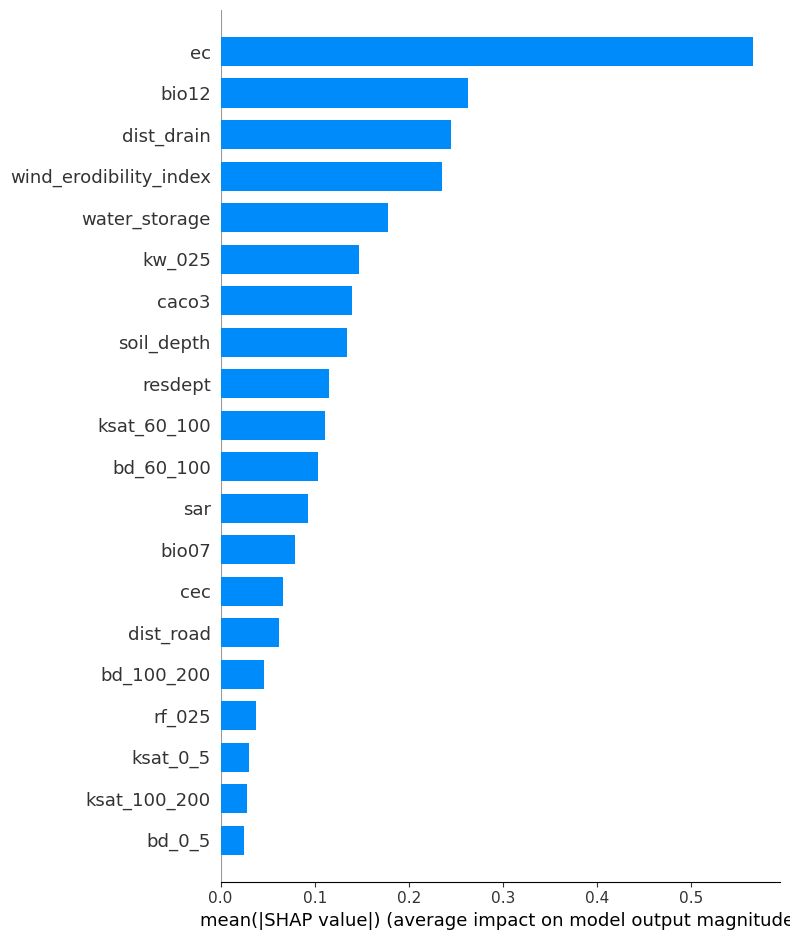

In [94]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [16]:
shap.initjs()

In [79]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [96]:
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_test.iloc[:500,:])

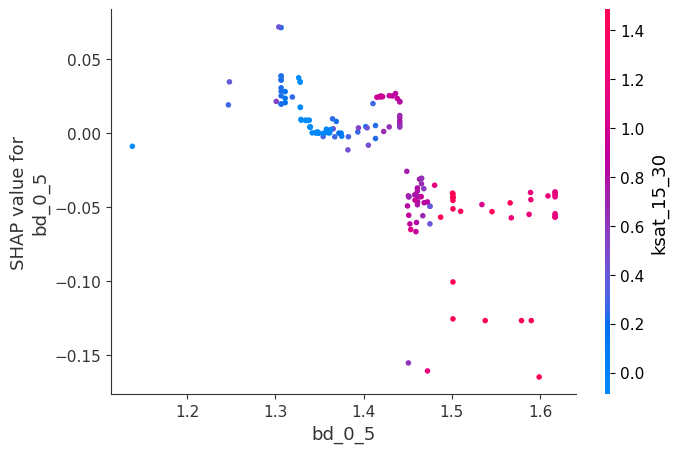

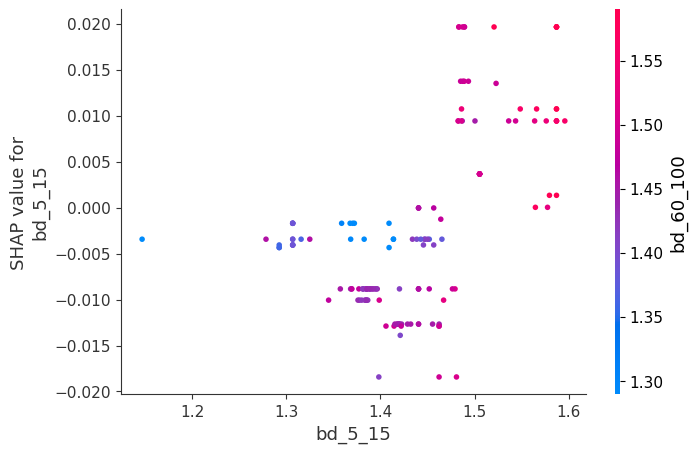

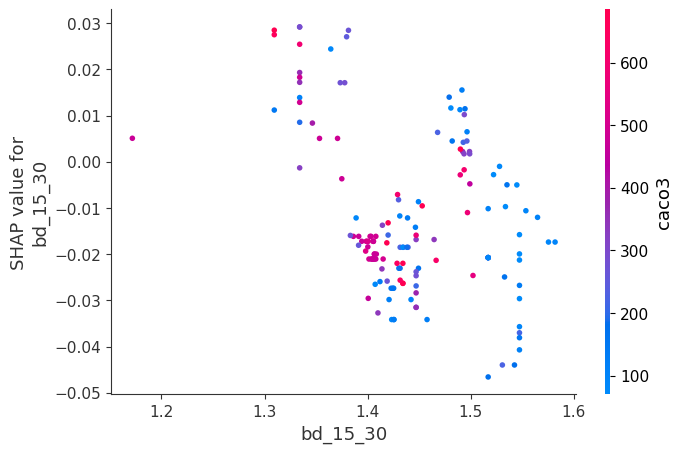

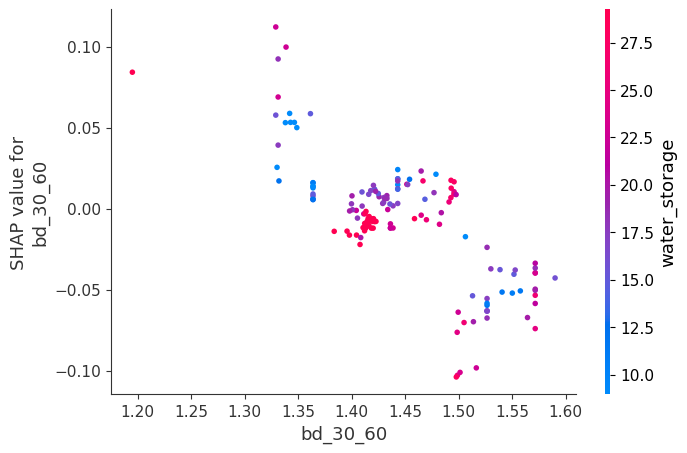

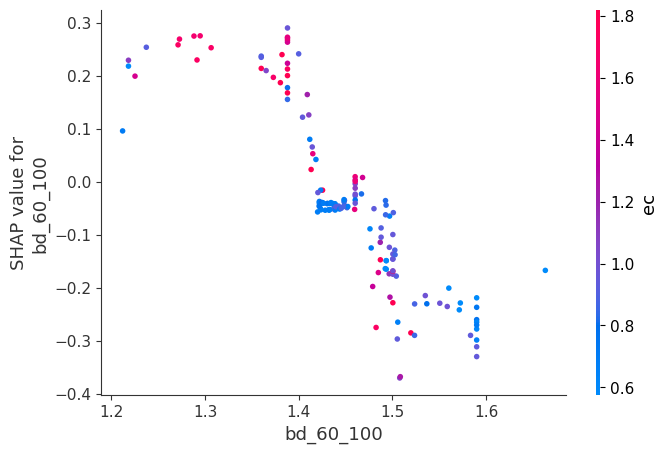

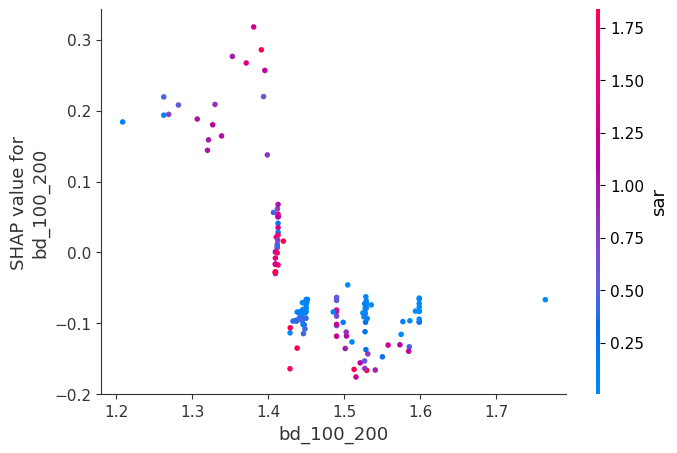

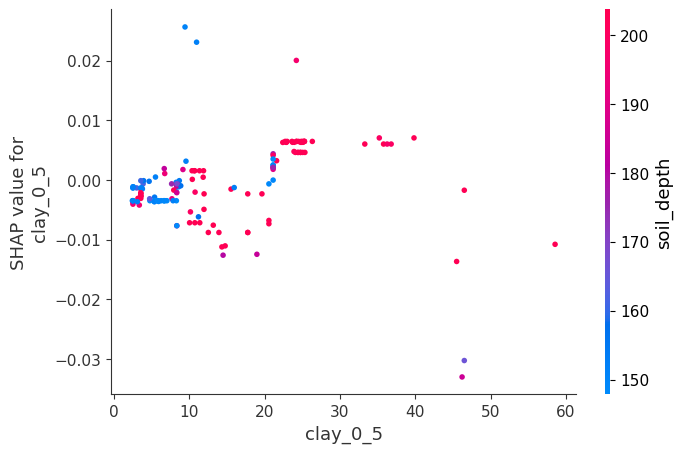

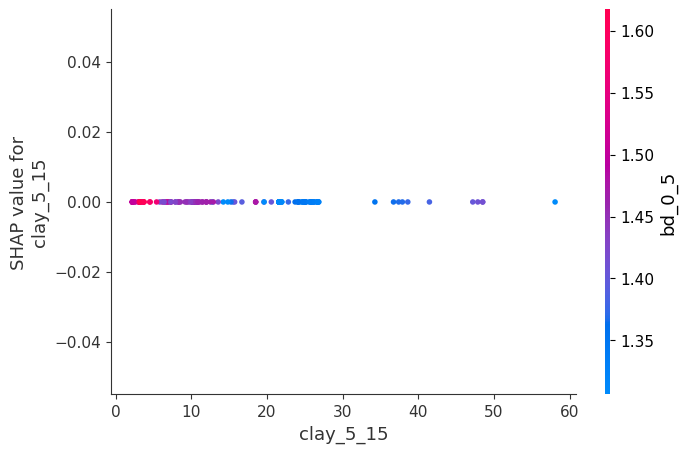

invalid value encountered in divide
invalid value encountered in divide


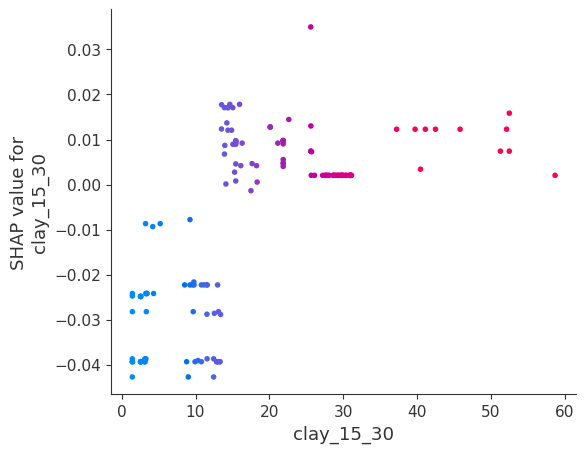

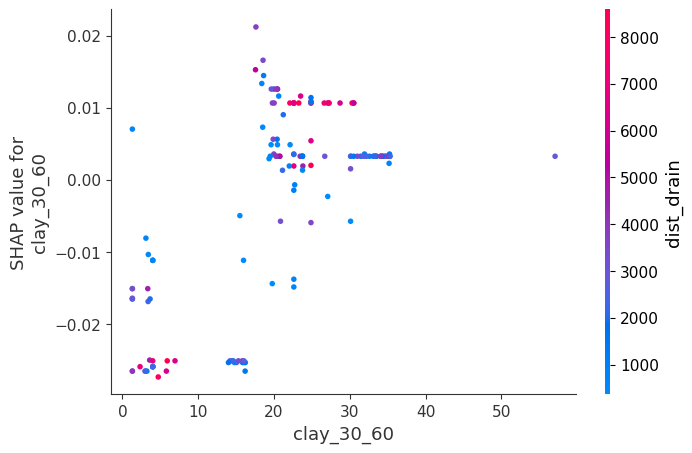

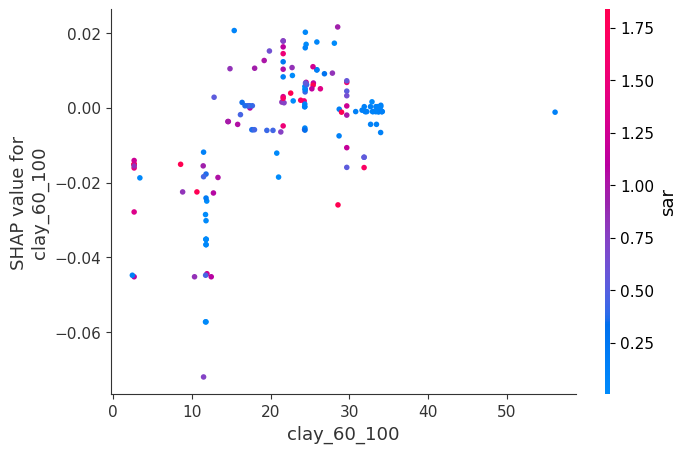

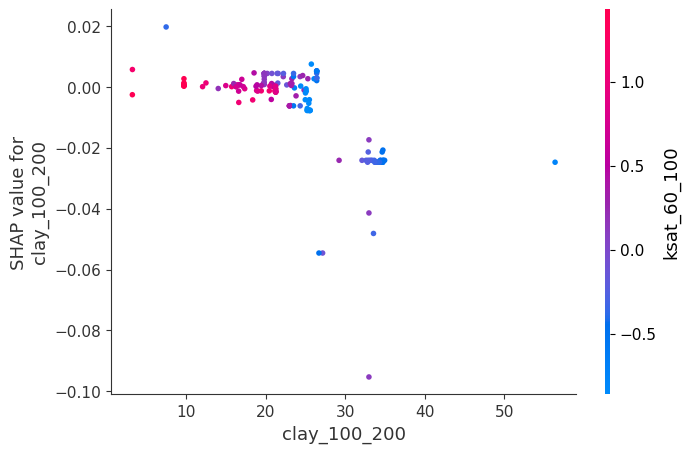

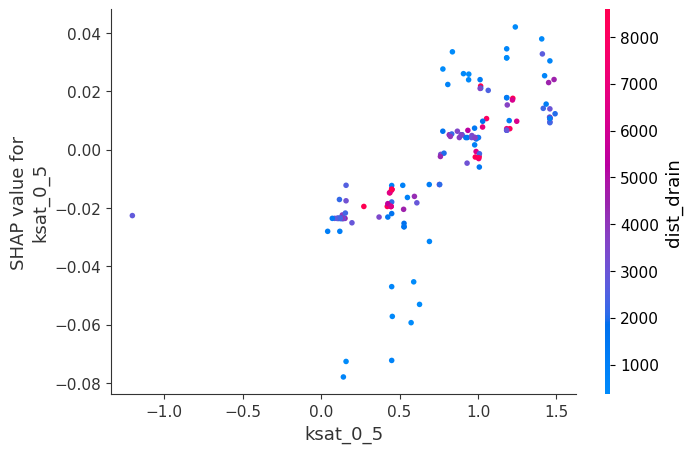

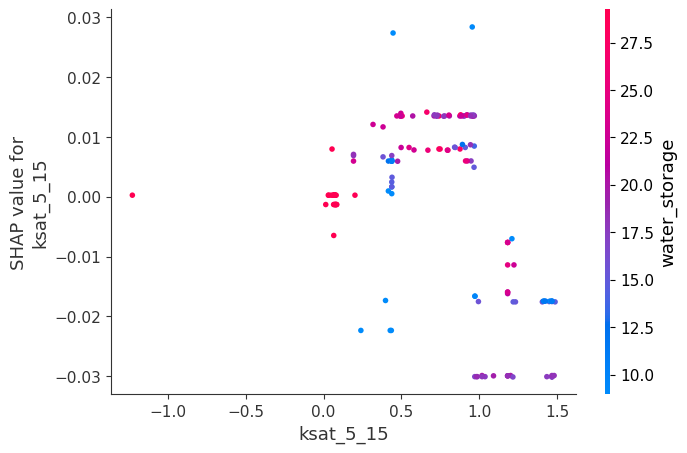

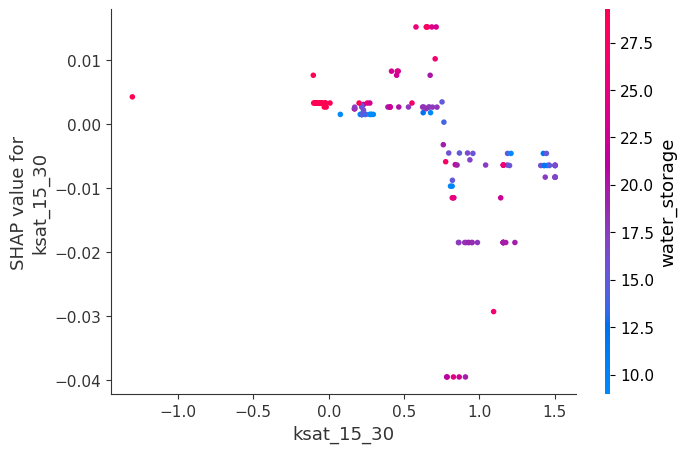

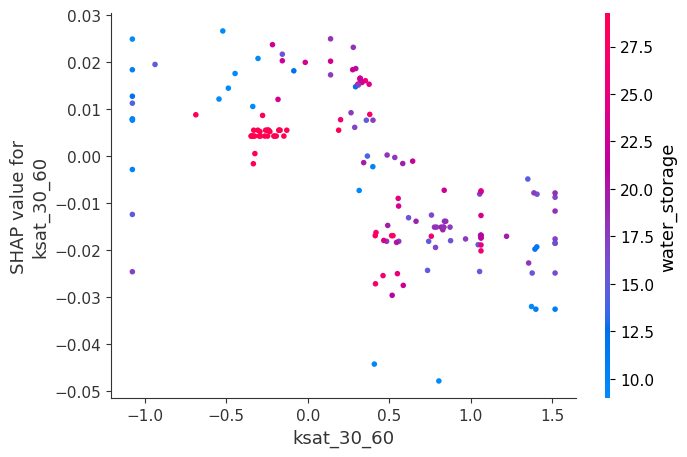

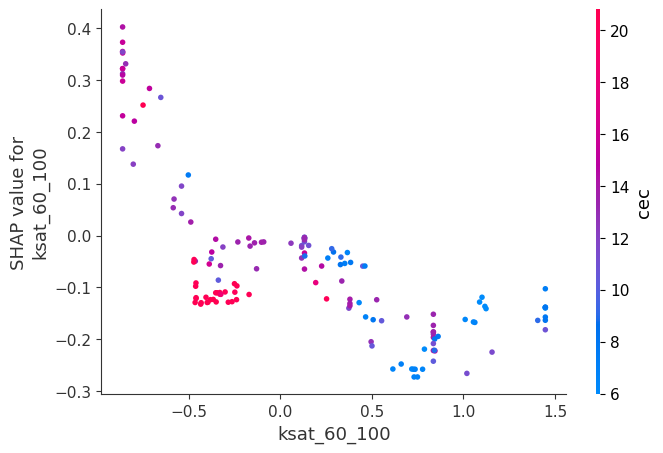

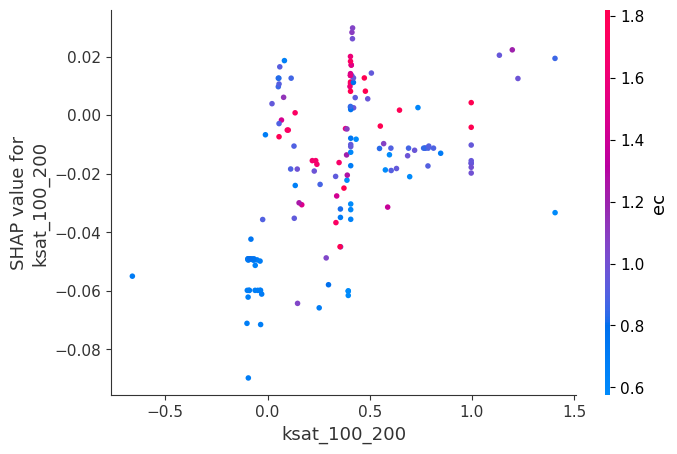

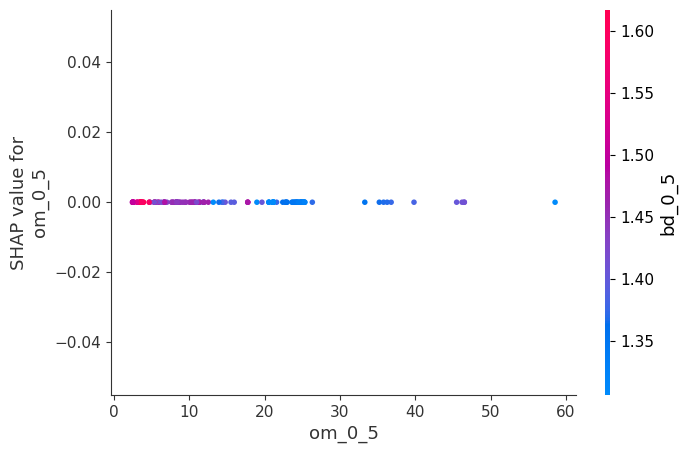

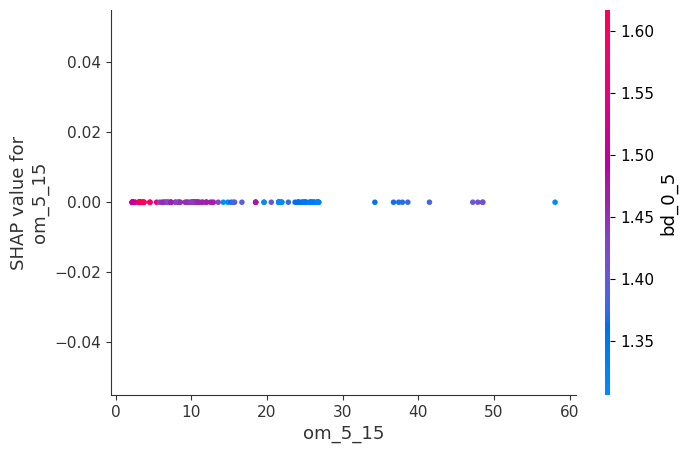

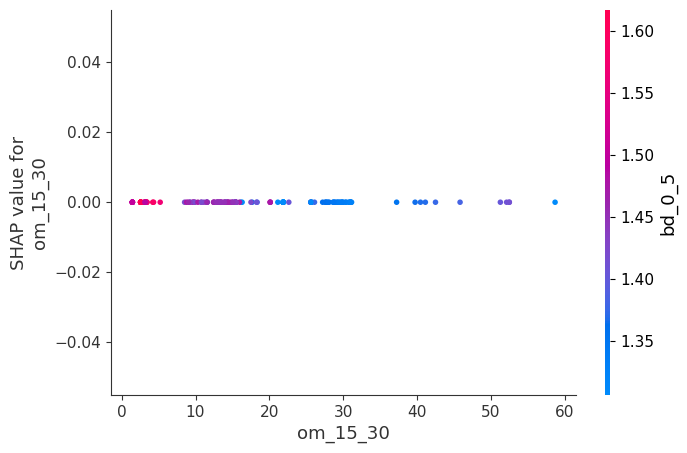

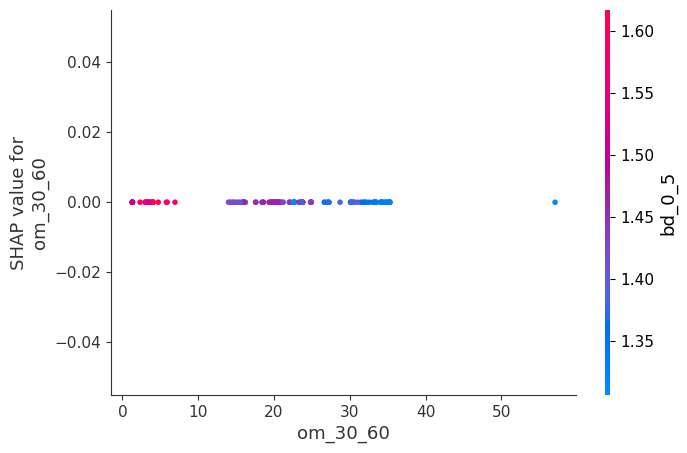

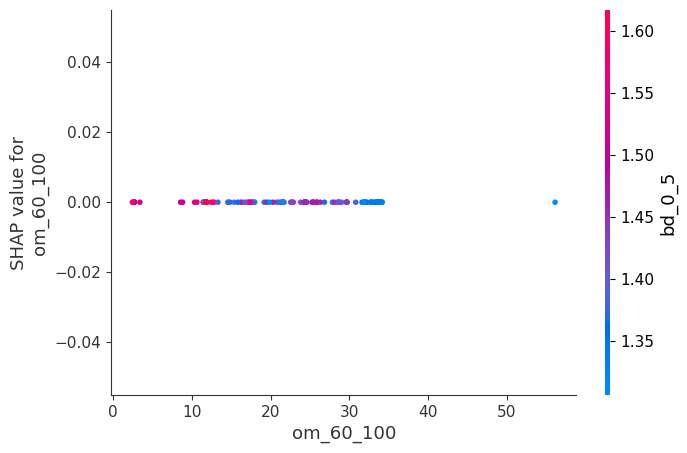

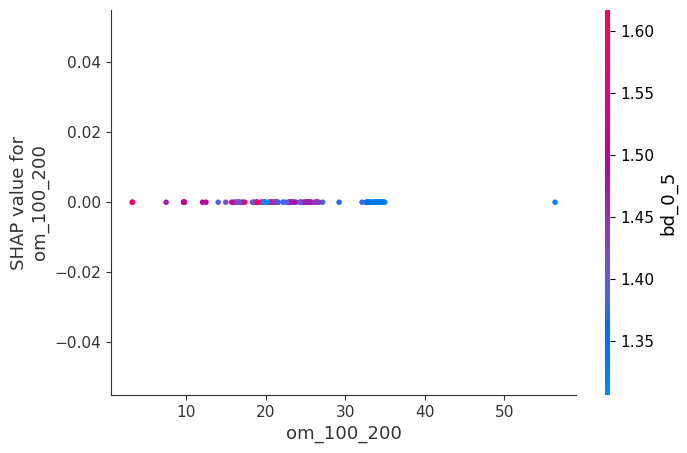

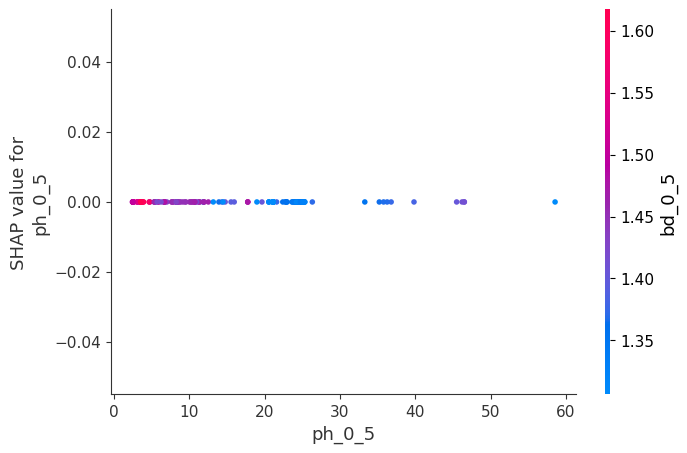

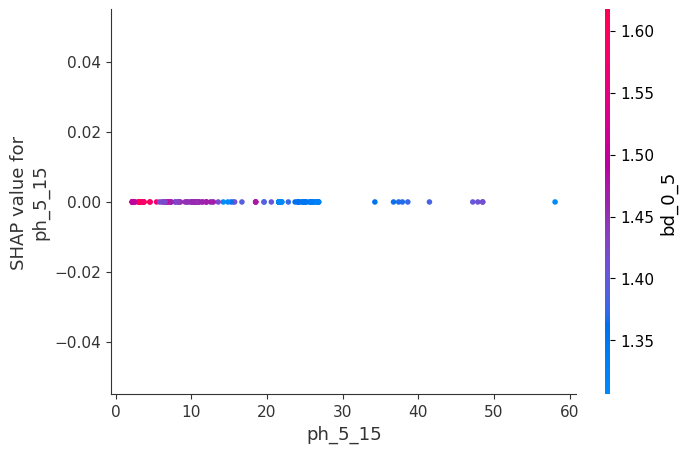

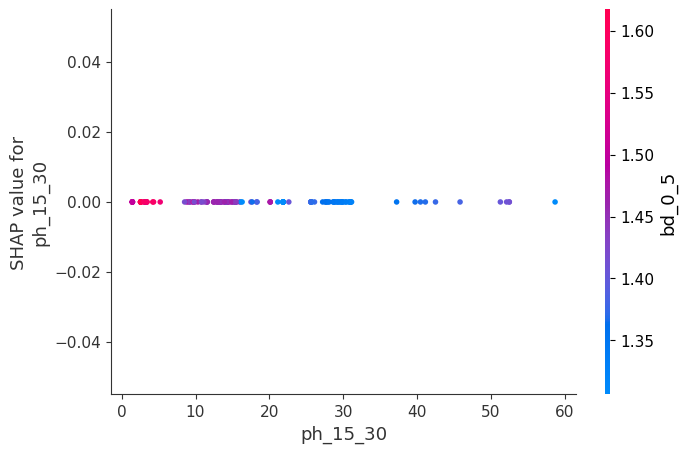

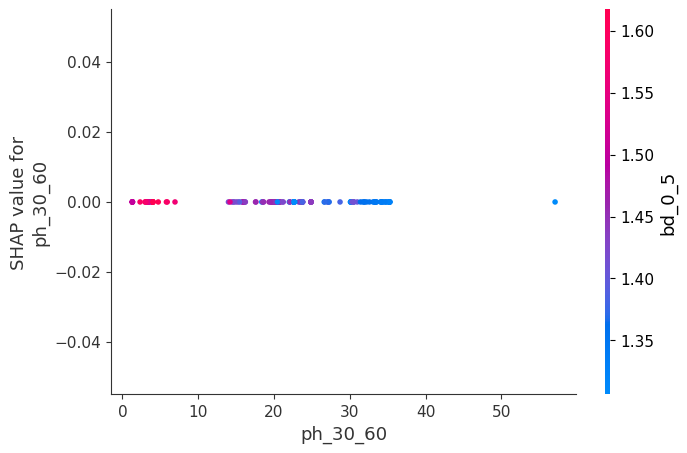

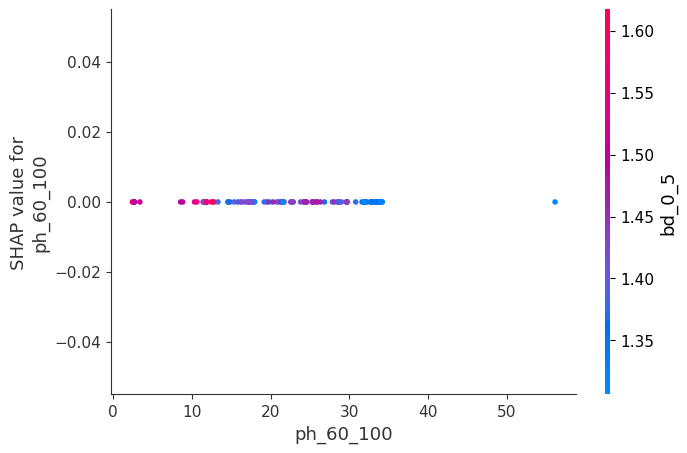

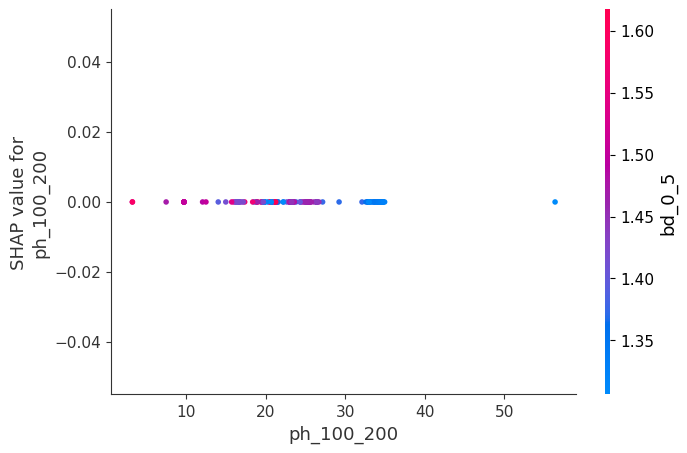

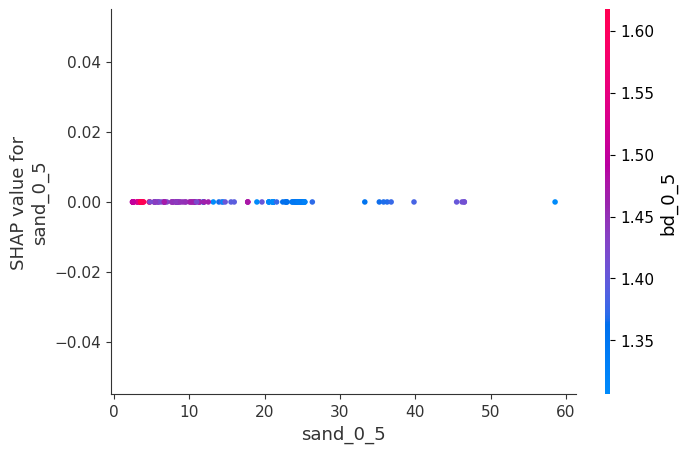

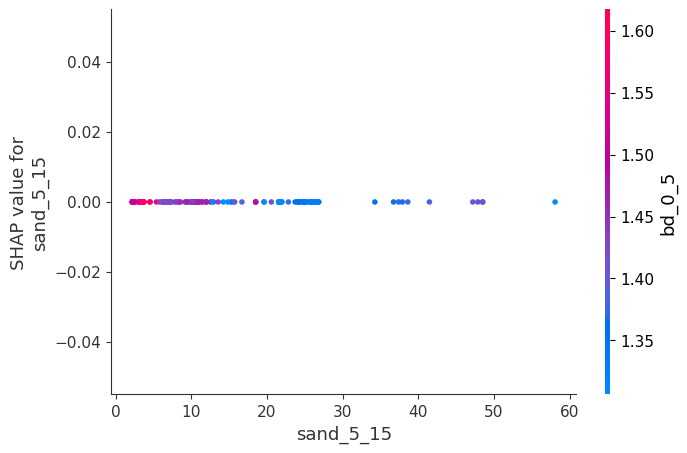

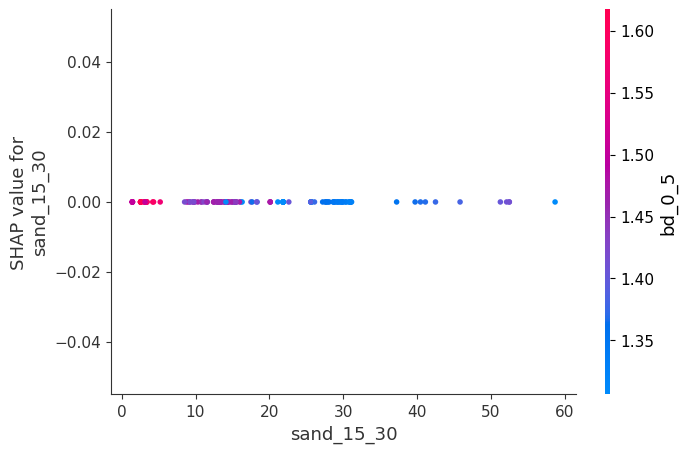

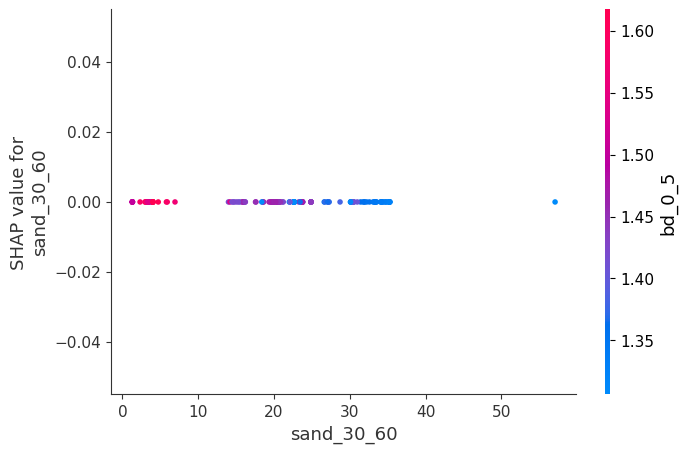

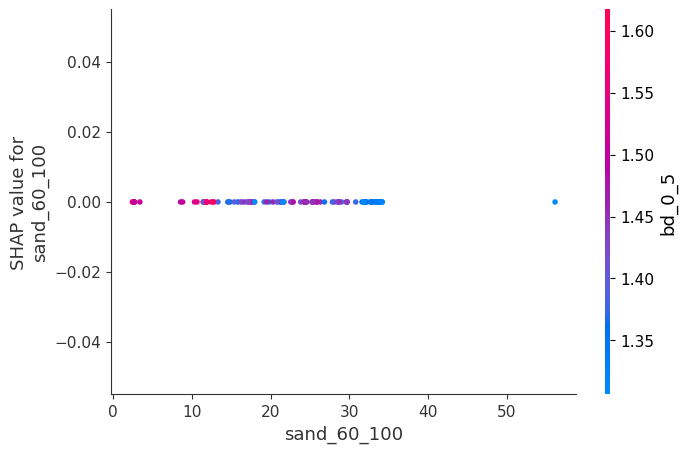

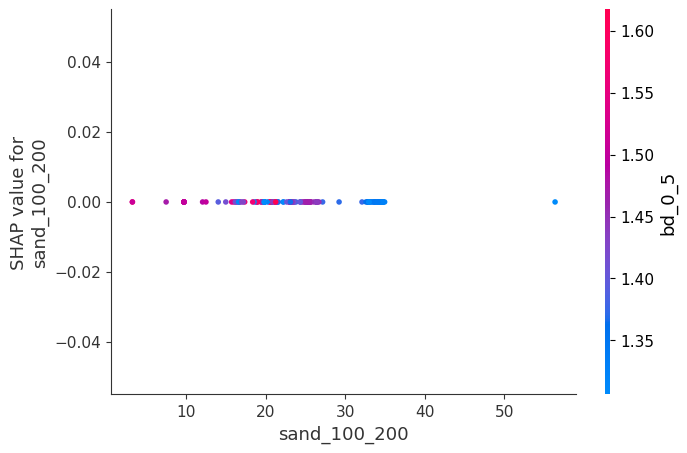

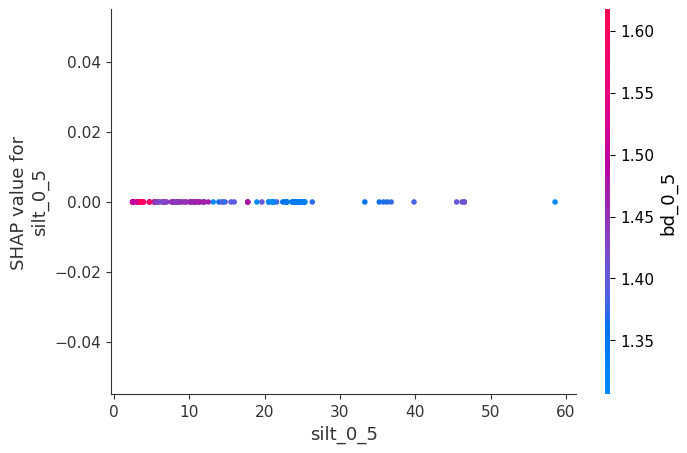

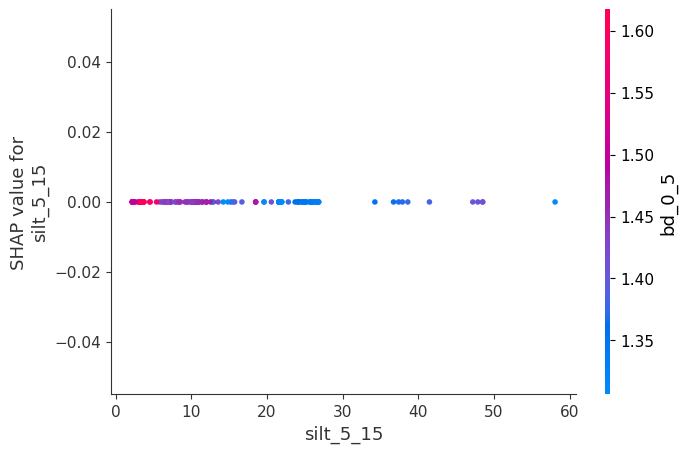

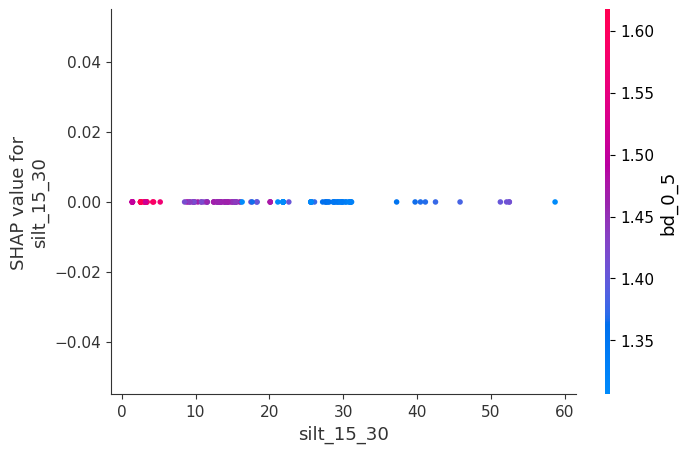

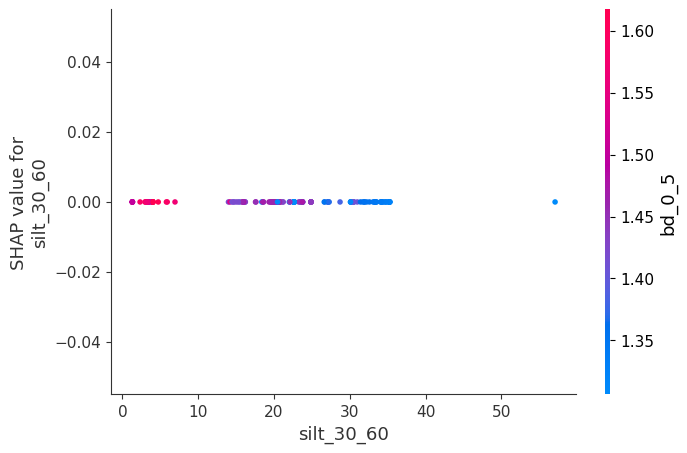

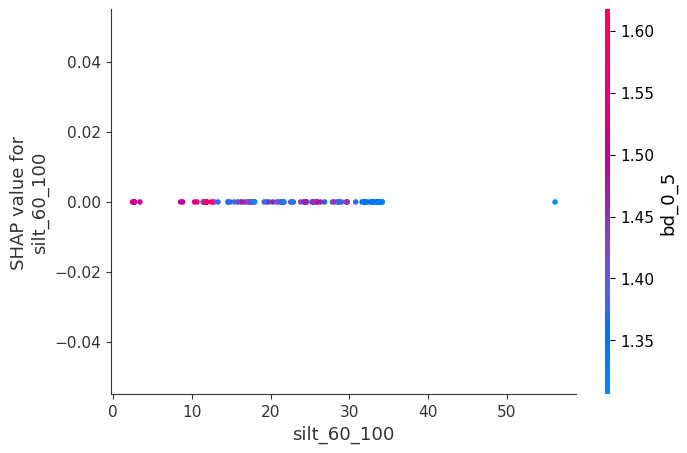

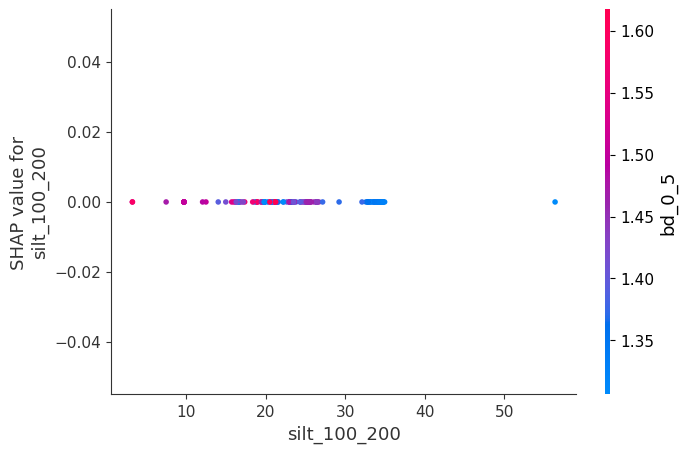

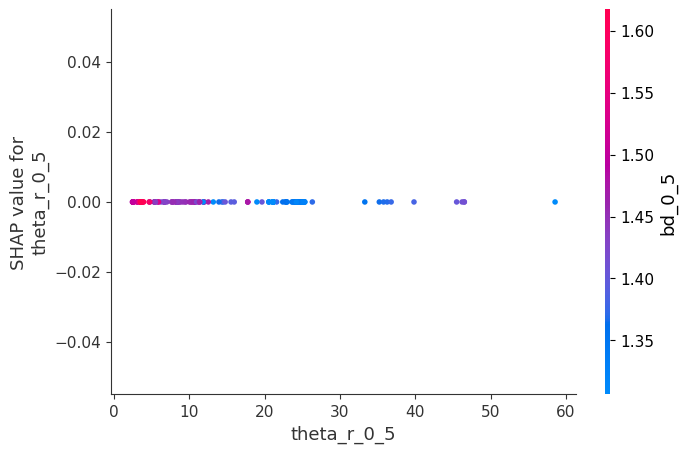

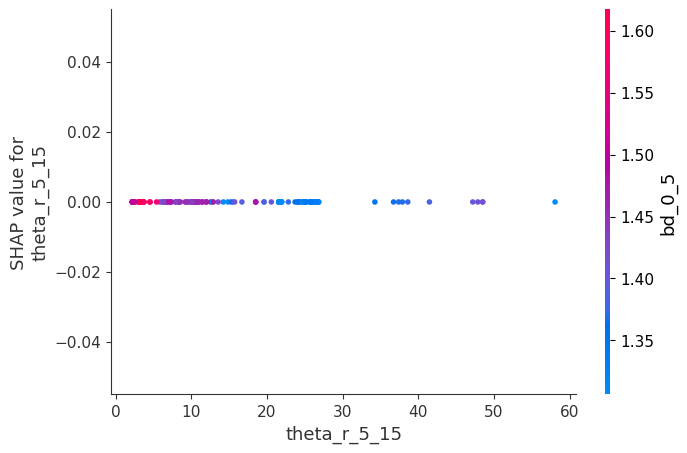

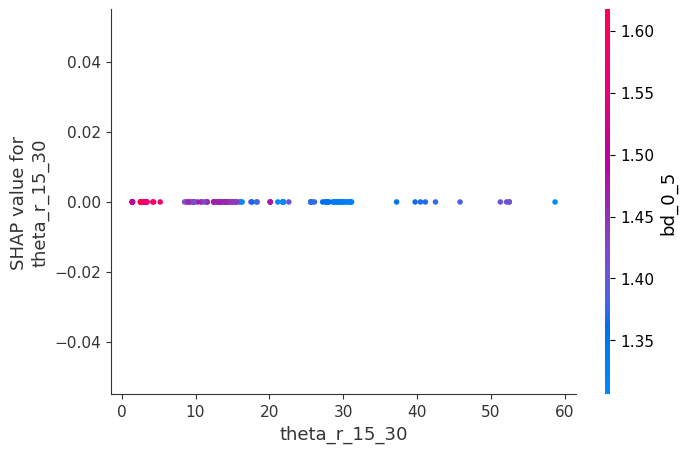

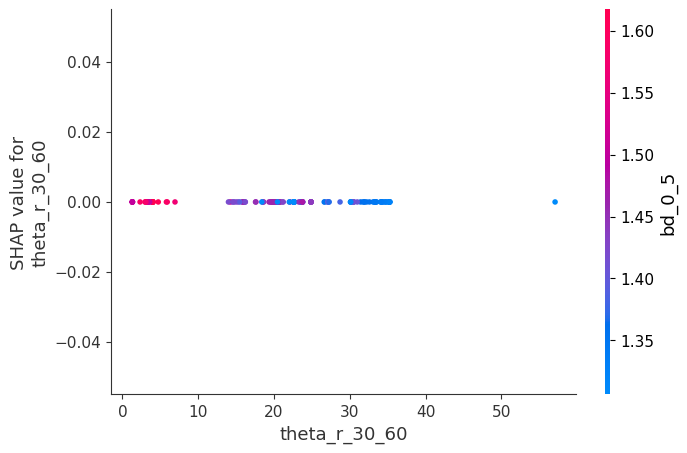

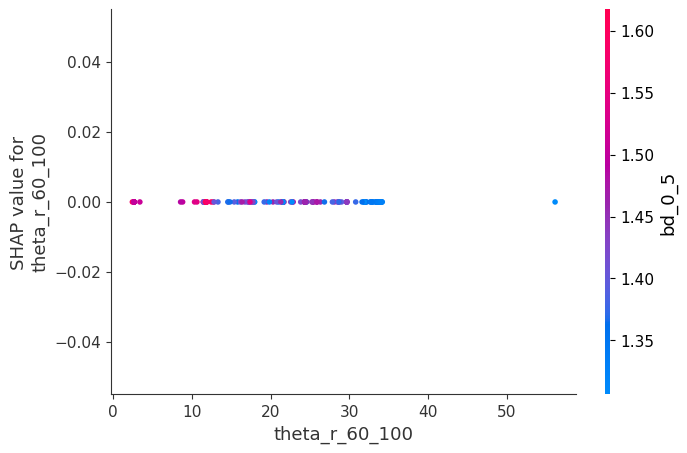

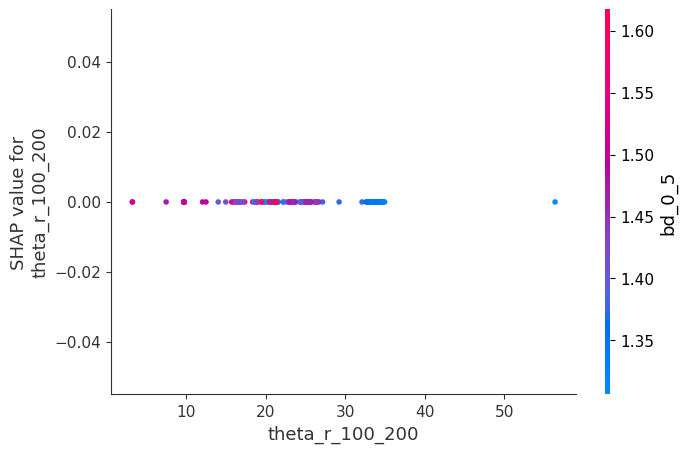

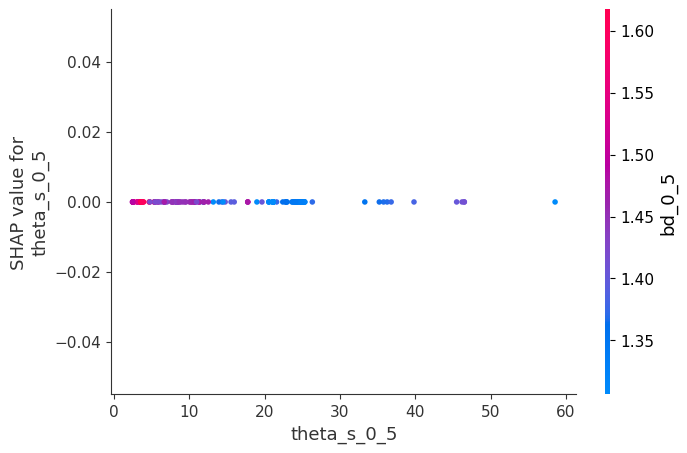

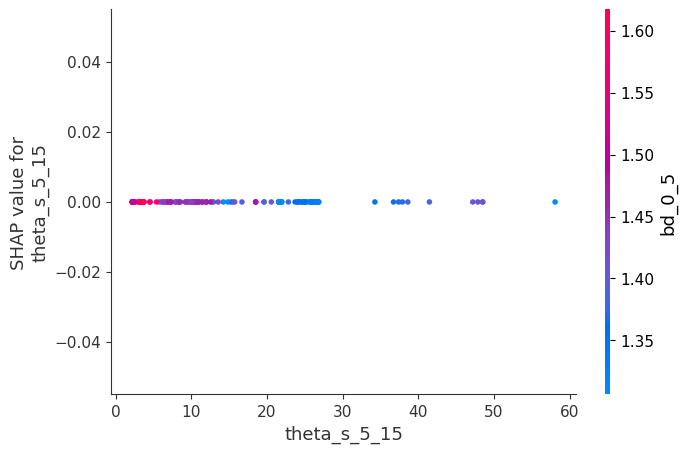

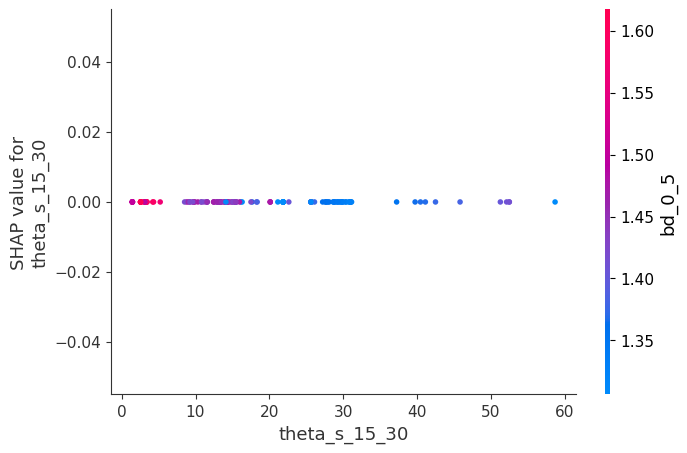

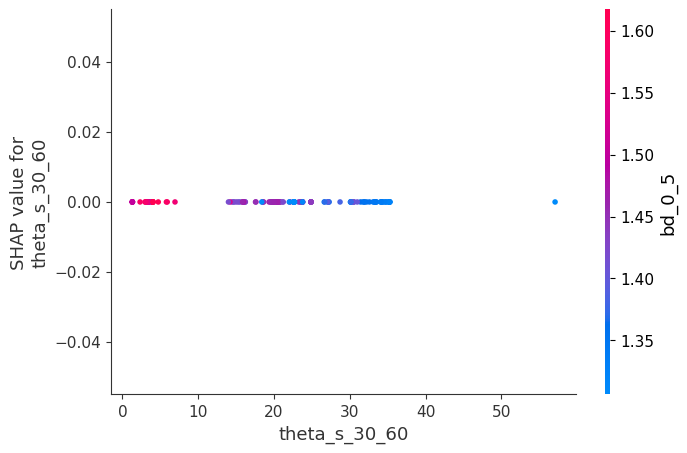

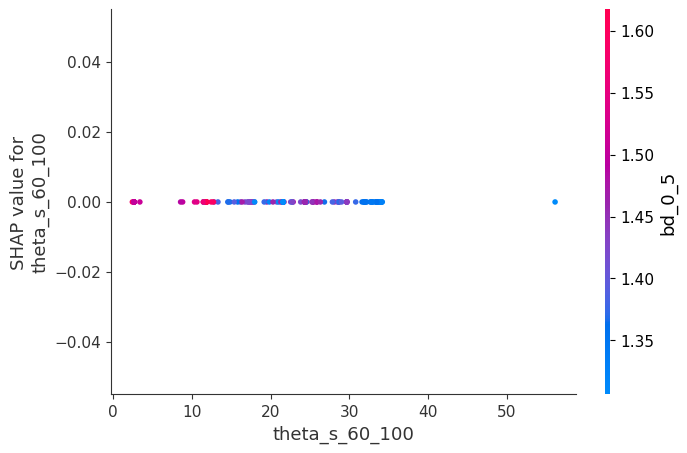

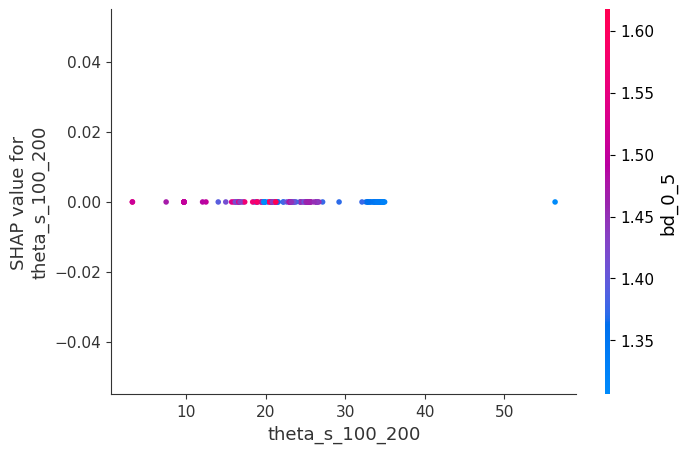

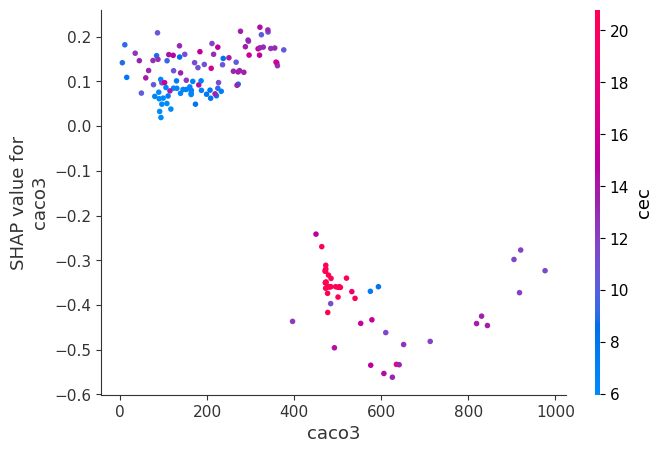

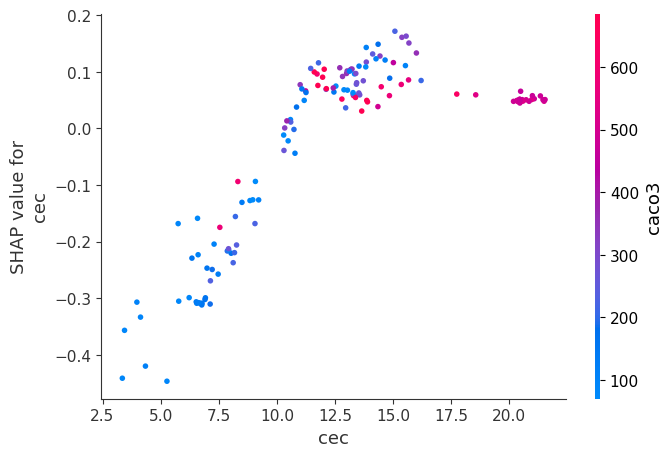

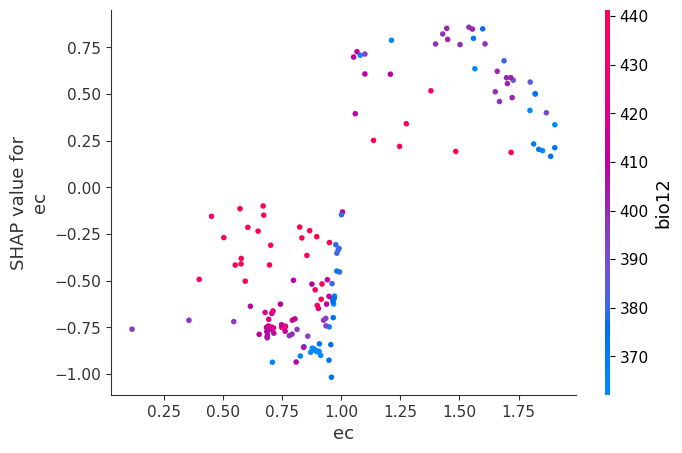

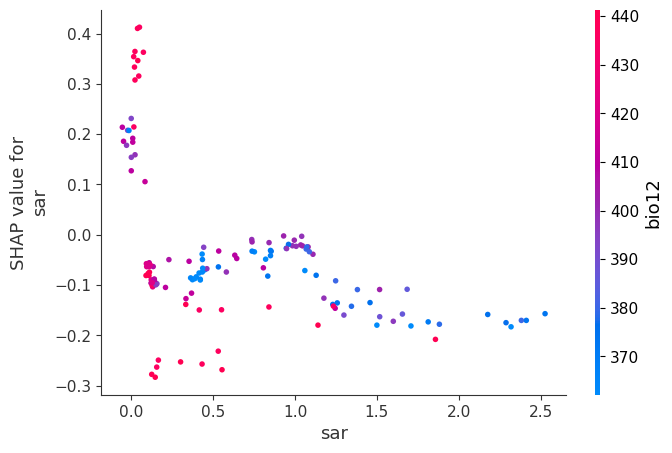

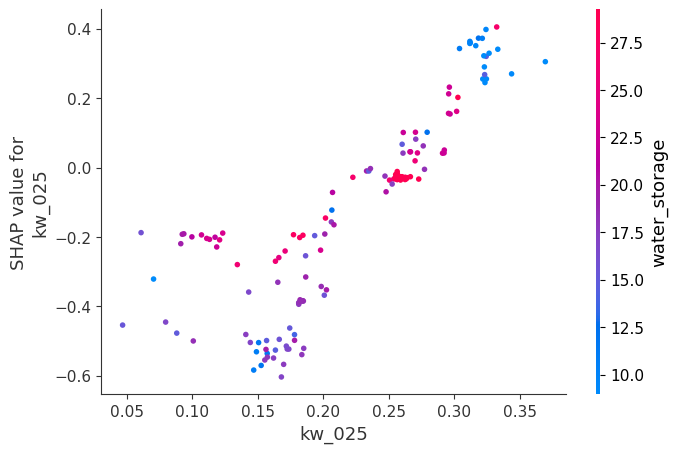

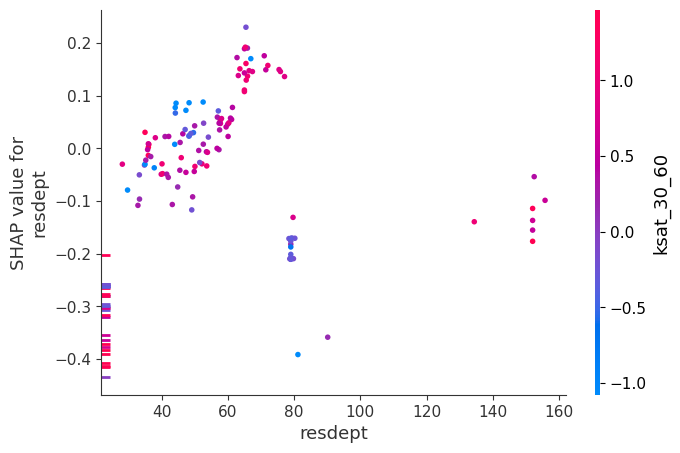

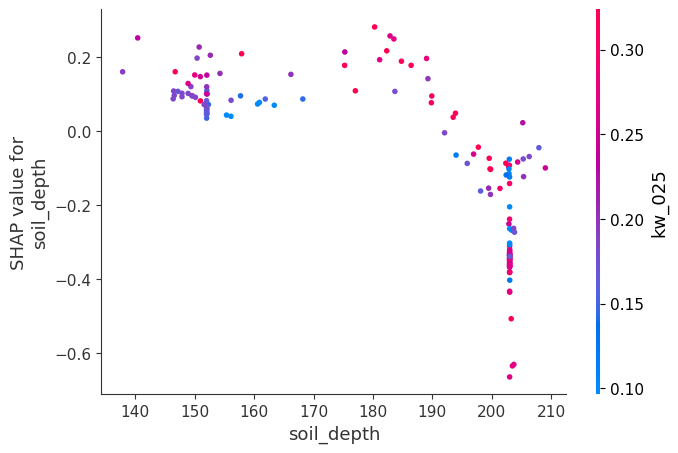

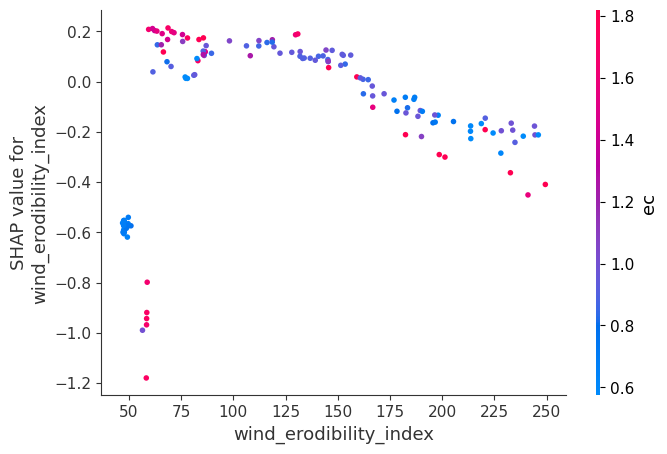

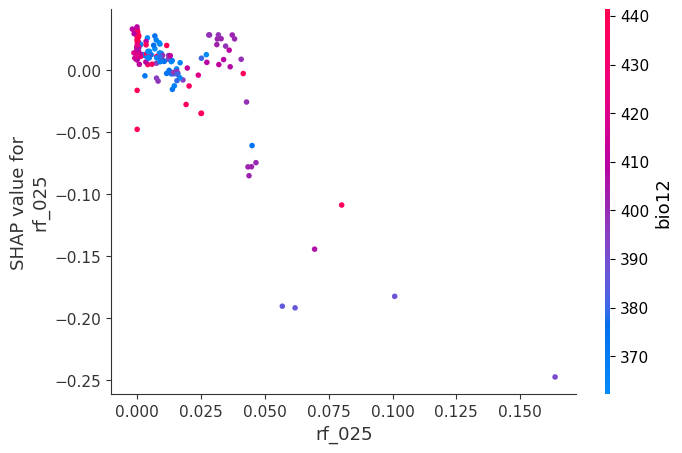

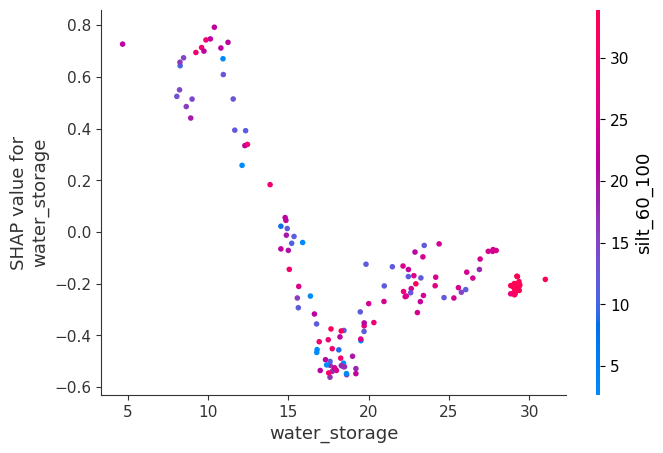

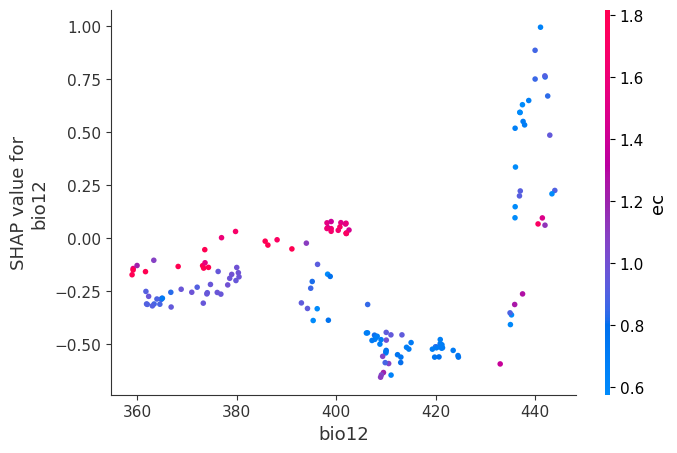

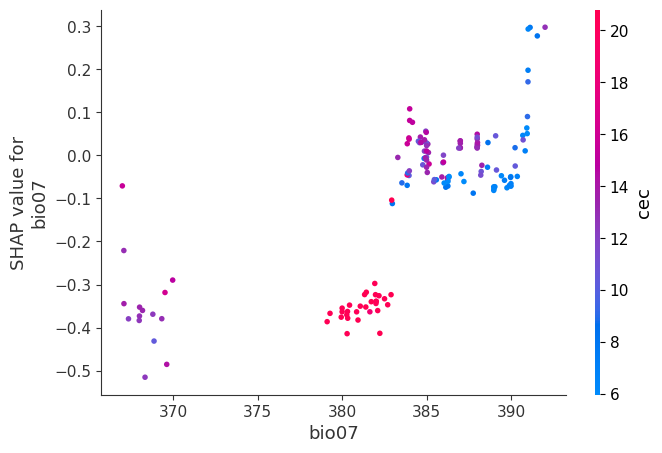

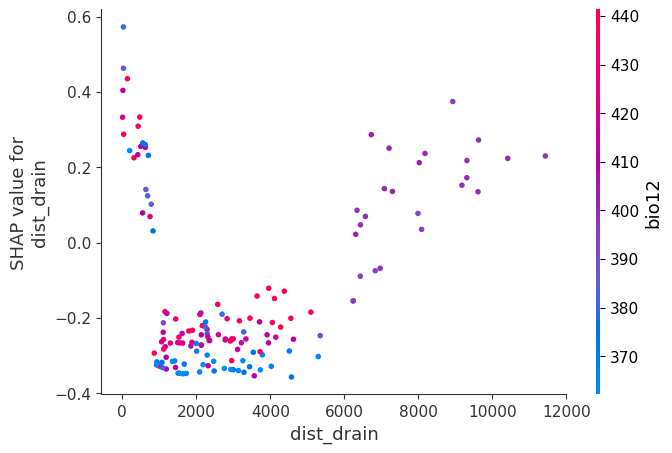

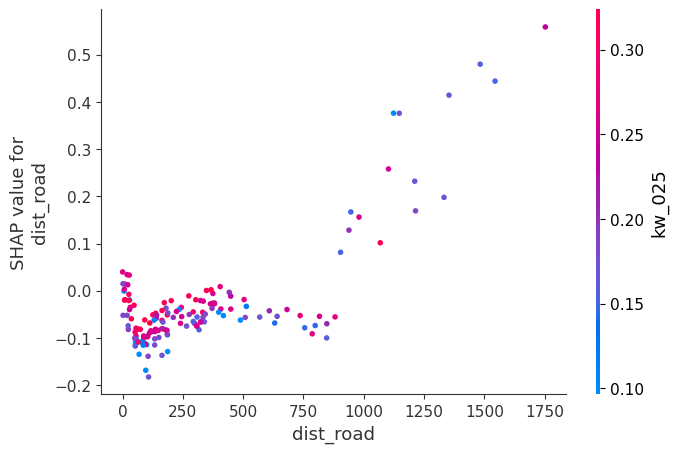

In [60]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_test, display_features=X_test)

In [61]:
explainer.expected_value

0.21132942

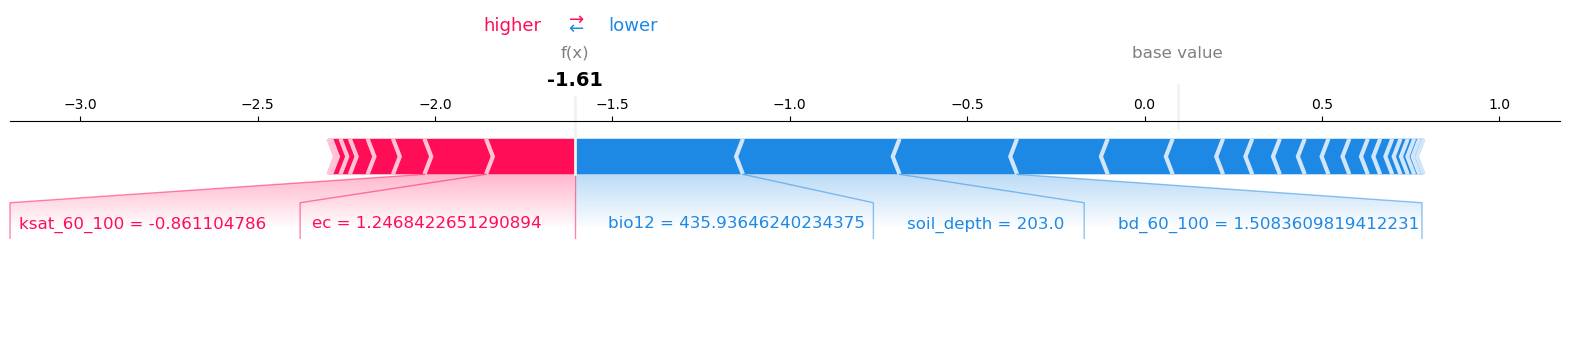

In [106]:
shap.plots.force(explainer.expected_value, shap_values[11,:], X_test.iloc[11, :], matplotlib = True) # can change to represent a row in the testing data

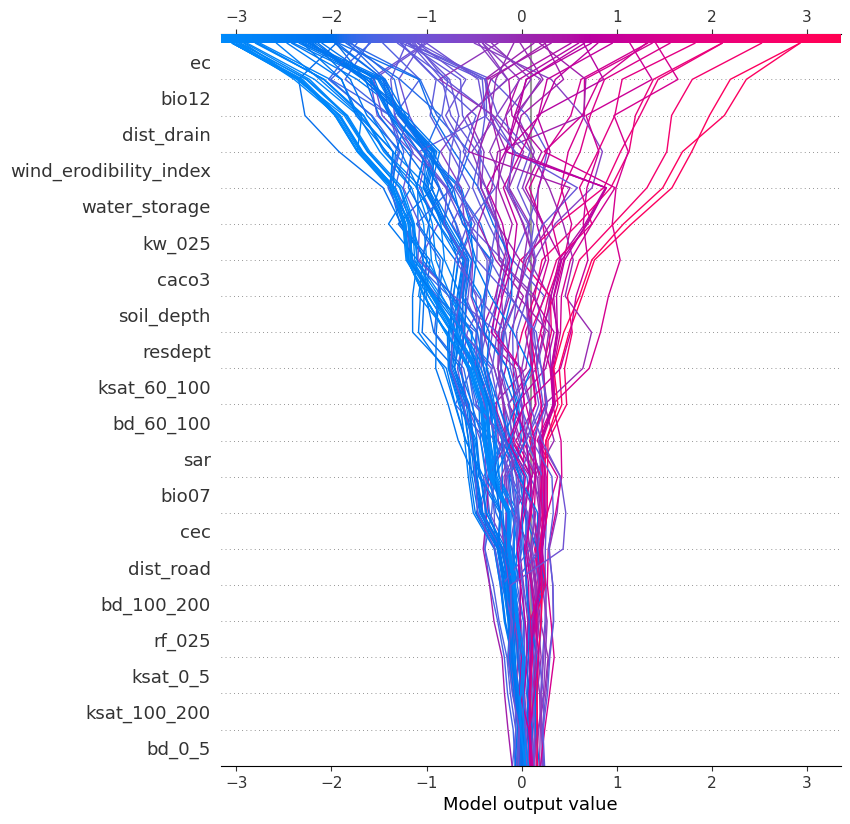

In [113]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)

# Testing a Random Forests model

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        85
           1       0.42      0.73      0.54        15

    accuracy                           0.81       100
   macro avg       0.68      0.78      0.71       100
weighted avg       0.87      0.81      0.83       100



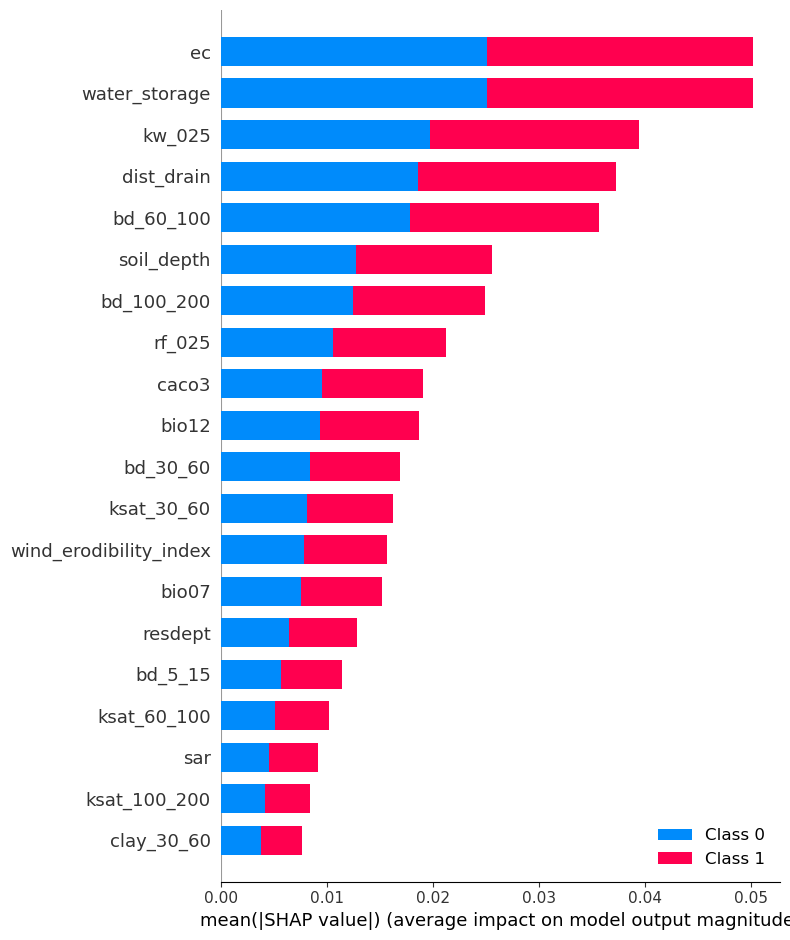

In [114]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

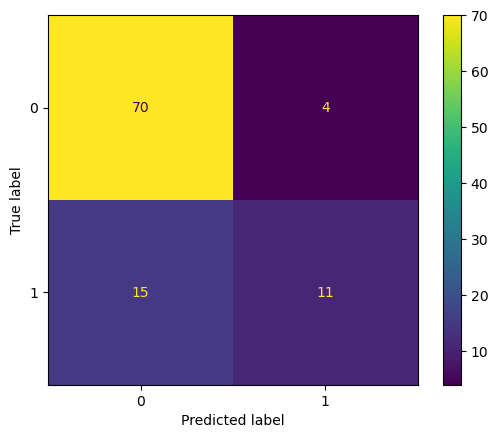

In [120]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)